In [1]:
import pandas as pd
import numpy as np
import time
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection  import GridSearchCV 
from xgboost.sklearn import XGBClassifier
from sklearn import  metrics    #scklearn functions
import matplotlib.pylab as plt
%matplotlib inline
# from matplotlib.pylab import rcParams
# rcParams['figure.figsize'] = 12, 4

In [2]:
train = pd.read_csv('cache/off_train_feat3.csv')
train = train.fillna(-1)
train.head()

,uid,spu_id,type,date,uiclick_3,uibuy_3,ui_ratio_3,uiclick_8,uibuy_8,ui_ratio_8,...,ub_ratio_8,ubbuy_21,ubclick_21,ub_ratio_21,ubbuy_34,ubclick_34,ub_ratio_34,ubbuy_89,ubclick_89,ub_ratio_89
0,228326,1080895,0,03-22,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,253864,2038905,0,03-23,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,154840,1330378,0,03-20,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,454004,311406,0,03-24,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,102550,1415108,0,03-22,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,0.0,9.0,0.0


In [3]:
test = pd.read_csv('cache/online_train_feat3.csv')
test = test.fillna(-1)
test.head()

,uid,spu_id,type,date,uiclick_3,uibuy_3,ui_ratio_3,uiclick_8,uibuy_8,ui_ratio_8,...,ub_ratio_8,ubbuy_21,ubclick_21,ub_ratio_21,ubbuy_34,ubclick_34,ub_ratio_34,ubbuy_89,ubclick_89,ub_ratio_89
0,522945,338312,0,03-28,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,334640,1130939,0,03-27,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,420321,1603326,0,03-27,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,44.0,0.0,0.0,44.0,0.0,0.0,141.0,0.0
3,41979,713518,0,03-29,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,52.0,0.0,0.0,52.0,0.0,0.0,69.0,0.0
4,534150,1009663,0,03-28,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [4]:
train.describe()

,uid,spu_id,type,buy,click,u_ratio,buy_2,click_2,u_ratio_2,buy_3,...,u_ratio_21,buy_34,click_34,u_ratio_34,buy_55,click_55,u_ratio_55,buy_89,click_89,u_ratio_89
count,5.083683e+06,5.083683e+06,5.083683e+06,5.083683e+06,5.083683e+06,5.083683e+06,5.083683e+06,5.083683e+06,5.083683e+06,5.083683e+06,...,5.083683e+06,5.083683e+06,5.083683e+06,5.083683e+06,5.083683e+06,5.083683e+06,5.083683e+06,5.083683e+06,5.083683e+06,5.083683e+06
mean,3.242576e+05,1.057647e+06,1.103865e-02,-3.064489e-01,1.408126e+01,-4.078690e-01,-8.543884e-02,2.788951e+01,-2.592997e-01,6.791159e-02,...,-2.617699e-02,2.456376e+00,3.820051e+02,-1.460780e-02,3.615184e+00,5.366087e+02,-9.263066e-03,4.756693e+00,6.940612e+02,-5.167805e-03
std,1.871766e+05,6.105792e+05,1.044835e-01,8.657046e-01,2.683330e+01,4.977156e-01,9.999982e-01,4.520661e+01,4.457897e-01,1.153934e+00,...,1.881669e-01,4.852377e+00,4.602630e+02,1.574731e-01,6.993608e+00,6.468768e+02,1.411502e-01,8.871097e+00,8.259981e+02,1.262337e-01
min,3.000000e+00,5.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,1.629740e+05,5.284290e+05,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,9.200000e+01,0.000000e+00,0.000000e+00,1.290000e+02,0.000000e+00,0.000000e+00,1.730000e+02,0.000000e+00
50%,3.243260e+05,1.059768e+06,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,1.100000e+01,0.000000e+00,0.000000e+00,...,0.000000e+00,1.000000e+00,2.340000e+02,1.254705e-03,1.000000e+00,3.260000e+02,2.849003e-03,2.000000e+00,4.270000e+02,3.623188e-03
75%,4.857900e+05,1.584581e+06,0.000000e+00,0.000000e+00,1.800000e+01,0.000000e+00,0.000000e+00,3.700000e+01,0.000000e+00,0.000000e+00,...,8.219178e-03,3.000000e+00,5.020000e+02,1.034483e-02,4.000000e+00,6.970000e+02,1.155556e-02,6.000000e+00,8.980000e+02,1.200369e-02
max,6.499890e+05,2.114305e+06,1.000000e+00,2.200000e+01,6.560000e+02,1.000000e+00,2.300000e+01,7.210000e+02,1.000000e+00,2.500000e+01,...,1.000000e+00,8.700000e+01,5.049000e+03,1.000000e+00,1.820000e+02,6.614000e+03,1.000000e+00,2.220000e+02,9.476000e+03,1.000000e+00


In [5]:
test.describe()

,uid,spu_id,type,buy,click,u_ratio,buy_2,click_2,u_ratio_2,buy_3,...,u_ratio_21,buy_34,click_34,u_ratio_34,buy_55,click_55,u_ratio_55,buy_89,click_89,u_ratio_89
count,5.331337e+06,5.331337e+06,5.331337e+06,5.331337e+06,5.331337e+06,5.331337e+06,5.331337e+06,5.331337e+06,5.331337e+06,5.331337e+06,...,5.331337e+06,5.331337e+06,5.331337e+06,5.331337e+06,5.331337e+06,5.331337e+06,5.331337e+06,5.331337e+06,5.331337e+06,5.331337e+06
mean,3.253177e+05,1.057858e+06,1.096704e-02,-3.530660e-01,1.293366e+01,-4.343849e-01,-1.320016e-01,2.560382e+01,-2.877686e-01,3.133342e-02,...,-2.683220e-02,1.925354e+00,2.989199e+02,-2.275038e-02,3.298222e+00,4.972473e+02,-1.232190e-02,4.577987e+00,6.660825e+02,-7.605803e-03
std,1.875326e+05,6.102542e+05,1.041478e-01,8.112605e-01,2.666648e+01,5.006426e-01,9.687068e-01,4.375965e+01,4.597426e-01,1.172049e+00,...,1.916182e-01,3.998331e+00,3.718557e+02,1.811016e-01,6.268284e+00,6.093351e+02,1.515001e-01,8.434140e+00,8.069819e+02,1.361281e-01
min,3.000000e+00,2.000000e+00,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,...,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00
25%,1.635880e+05,5.290100e+05,0.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,6.800000e+01,0.000000e+00,0.000000e+00,1.170000e+02,0.000000e+00,0.000000e+00,1.590000e+02,0.000000e+00
50%,3.256190e+05,1.062819e+06,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,9.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,1.820000e+02,0.000000e+00,1.000000e+00,3.010000e+02,2.481390e-03,2.000000e+00,4.030000e+02,3.496503e-03
75%,4.873600e+05,1.585468e+06,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,0.000000e+00,3.400000e+01,0.000000e+00,0.000000e+00,...,9.216590e-03,2.000000e+00,3.920000e+02,9.575923e-03,4.000000e+00,6.460000e+02,1.117318e-02,6.000000e+00,8.630000e+02,1.190476e-02
max,6.499970e+05,2.114305e+06,1.000000e+00,1.800000e+01,4.810000e+02,1.000000e+00,2.100000e+01,9.600000e+02,1.000000e+00,2.600000e+01,...,1.000000e+00,9.700000e+01,4.009000e+03,1.000000e+00,1.480000e+02,6.345000e+03,1.000000e+00,2.120000e+02,8.637000e+03,1.000000e+00


In [4]:
#正例
train_postive = train[train['type'] == 1]
#负例
train_negative = train[train['type'] == 0]

In [5]:
del train
# print train_postive[:2]
# print train_negative[:2]

In [6]:
len(train_negative) , len(train_postive)

(5027566, 56117)

In [7]:
sampler = np.random.randint(0,len(train_negative), size = int(len(train_negative)*0.8))
len(sampler)

4022052

In [8]:
train = pd.concat([train_postive,train_postive,train_postive,train_postive, train_negative.take(sampler),train_postive,train_postive,train_postive,train_postive],axis=0,ignore_index=True)
del sampler

In [9]:
del train_negative
del train_postive

In [10]:
train_label = train['type']
test_label = test['type']

In [11]:
train = train.drop(['uid', 'spu_id', 'type','date'],axis =1) 
test = test.drop(['uid', 'spu_id', 'type','date'],axis=1) 
# train = train[['click_5','buy_5','u_ratio_5','click_55','buy_55','u_ratio_55']] 
# test = test[['click_5','buy_5','u_ratio_5','click_55','buy_55','u_ratio_55']]

In [12]:
train.head()

,uiclick_3,uibuy_3,ui_ratio_3,uiclick_8,uibuy_8,ui_ratio_8,uiclick_21,uibuy_21,ui_ratio_21,uiclick_34,...,ub_ratio_8,ubbuy_21,ubclick_21,ub_ratio_21,ubbuy_34,ubclick_34,ub_ratio_34,ubbuy_89,ubclick_89,ub_ratio_89
0,1.0,0.0,0.0,2.0,0.0,0.0,2.0,0.0,0.0,2.0,...,0.0,0.0,23.0,0.0,0.0,23.0,0.0,0.0,23.0,0.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,0.0,0.0,2.0,...,-1.0,0.0,4.0,0.0,0.0,9.0,0.0,1.0,10.0,0.1
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,6.0,0.0,0.0,6.0,0.0,0.0,6.0,0.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [13]:
test.head()

,uiclick_3,uibuy_3,ui_ratio_3,uiclick_8,uibuy_8,ui_ratio_8,uiclick_21,uibuy_21,ui_ratio_21,uiclick_34,...,ub_ratio_8,ubbuy_21,ubclick_21,ub_ratio_21,ubbuy_34,ubclick_34,ub_ratio_34,ubbuy_89,ubclick_89,ub_ratio_89
0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,0.0,5.0,0.0,0.0,5.0,0.0,0.0,5.0,0.0
2,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,44.0,0.0,0.0,44.0,0.0,0.0,141.0,0.0
3,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,0.0,0.0,52.0,0.0,0.0,52.0,0.0,0.0,69.0,0.0
4,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [14]:
print train_label.values
print test_label.values

[1 1 1 ..., 1 1 1]
[0 0 0 ..., 0 0 0]


In [15]:
dtrain = xgb.DMatrix(train, train_label)

In [16]:
del train,train_label

In [21]:
dtrain.save_binary('cache/off_train.buffer')

In [17]:
dtest = xgb.DMatrix(test,test_label)

In [25]:
del test,test_label

In [22]:
dtest.save_binary('cache/off_test.buffer')

In [18]:
# 自定义的评价函数:概率的均方误差
def  eval_avg_sqt( preds, dtrain ):
    label = dtrain.get_label()
    #label = dtrain
    error = np.sqrt(np.square(label - preds).sum()*1.0/len(label))
    return  'FSCORE',float(error)

# 自定义的评价函数: precision and recall
def eval_customedscore(preds, dtrain):
    label = dtrain.get_label()
    p_label = np.where(preds > 0.5, 1, 0)
    confusion_matrixs = metrics.confusion_matrix(label, p_label)
    recall = float(confusion_matrixs[0][0]) / float(confusion_matrixs[0][1]+ confusion_matrixs[0][0])
    precision = float(confusion_matrixs[0][0]) / float(confusion_matrixs[1][0]+confusion_matrixs[0][0])
    F = precision* recall/(precision+recall)     
    return 'FSCORE',float(F)

[ 0.04631035  0.14725082  0.04532608 ...,  0.09429498  0.40703386
  0.04397944]


In [31]:
params = {        
            'max_depth':3,
            'min_child_weight':3,
            'eta':0.3,
            'subsample':1,
            'colsample_bytree':1,
            'scale_pos_weight':1,
            'max_delta_step': 0,
            'eval_metric':'auc',
            'lambda' :0,
            'alpha': 0,
            'gamma': 1,
            'seed': 1,
            'objective':'binary:logistic',
}
evallist = [ (dtest, 'val'), (dtrain, 'train')]

t0 = time.time()
model = xgb.train(params,dtrain,num_boost_round=53,evals = evallist, early_stopping_rounds=10 ,feval=eval_avg_sqt)
print time.time() - t0

model.best_score,model.best_iteration,model.best_ntree_limit

[0]	val-auc:0.769076	train-auc:0.784511	val-FSCORE:0.38218	train-FSCORE:0.404408
Multiple eval metrics have been passed: 'train-FSCORE' will be used for early stopping.

Will train until train-FSCORE hasn't improved in 10 rounds.
[1]	val-auc:0.786938	train-auc:0.802865	val-FSCORE:0.304884	train-FSCORE:0.348623
[2]	val-auc:0.789555	train-auc:0.805532	val-FSCORE:0.252914	train-FSCORE:0.316103
[3]	val-auc:0.791442	train-auc:0.807742	val-FSCORE:0.21808	train-FSCORE:0.297663
[4]	val-auc:0.792161	train-auc:0.808514	val-FSCORE:0.194818	train-FSCORE:0.287281
[5]	val-auc:0.793173	train-auc:0.809549	val-FSCORE:0.179412	train-FSCORE:0.281485
[6]	val-auc:0.795949	train-auc:0.812128	val-FSCORE:0.169446	train-FSCORE:0.278161
[7]	val-auc:0.798563	train-auc:0.814107	val-FSCORE:0.16307	train-FSCORE:0.276376
[8]	val-auc:0.801416	train-auc:0.816654	val-FSCORE:0.158786	train-FSCORE:0.27514
[9]	val-auc:0.801747	train-auc:0.817634	val-FSCORE:0.155888	train-FSCORE:0.274418
[10]	val-auc:0.804092	train-auc:0.8

KeyboardInterrupt: 

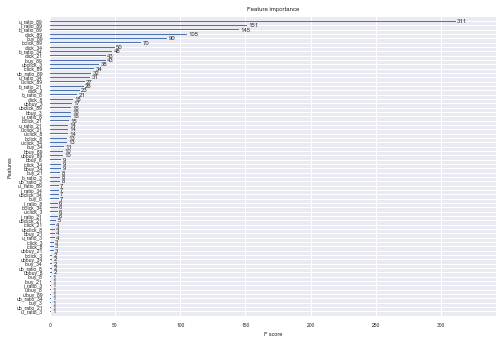

In [32]:
%matplotlib inline
import seaborn as sns
sns.set(font_scale = 0.5)
xgb.plot_importance(model)

0.099818951764003919

In [28]:
params = {        
            'max_depth':3,
            'min_child_weight':3,
            'eta':0.3,
            'subsample':1,
            'colsample_bytree':1,
            'scale_pos_weight':1,
            'max_delta_step': 0,
            'eval_metric':'auc',
            'lambda' :0,
            'alpha': 0,
            'gamma': 0,
            'seed': 1,
            'objective':'binary:logistic',
}
evallist = [ (dtest, 'val'), (dtrain, 'train')]

t0 = time.time()
model = xgb.train(params,dtrain,num_boost_round=53,evals = evallist, early_stopping_rounds=10 ,feval=eval_avg_sqt)
print time.time() - t0

model.best_score,model.best_iteration,model.best_ntree_limit

[0]	val-auc:0.769076	train-auc:0.784511	val-FSCORE:0.38218	train-FSCORE:0.404408
Multiple eval metrics have been passed: 'train-FSCORE' will be used for early stopping.

Will train until train-FSCORE hasn't improved in 10 rounds.
[1]	val-auc:0.786938	train-auc:0.802865	val-FSCORE:0.304884	train-FSCORE:0.348623
[2]	val-auc:0.789555	train-auc:0.805532	val-FSCORE:0.252914	train-FSCORE:0.316103
[3]	val-auc:0.791442	train-auc:0.807742	val-FSCORE:0.21808	train-FSCORE:0.297663
[4]	val-auc:0.792161	train-auc:0.808514	val-FSCORE:0.194818	train-FSCORE:0.287281
[5]	val-auc:0.793173	train-auc:0.809549	val-FSCORE:0.179412	train-FSCORE:0.281485
[6]	val-auc:0.795949	train-auc:0.812128	val-FSCORE:0.169446	train-FSCORE:0.278161
[7]	val-auc:0.798563	train-auc:0.814107	val-FSCORE:0.16307	train-FSCORE:0.276376
[8]	val-auc:0.801416	train-auc:0.816654	val-FSCORE:0.158786	train-FSCORE:0.27514
[9]	val-auc:0.801747	train-auc:0.817634	val-FSCORE:0.155888	train-FSCORE:0.274418
[10]	val-auc:0.804092	train-auc:0.8

KeyboardInterrupt: 

In [ ]:
sampler = np.random.randint(0,len(train_negative), size = int(len(train_negative)*0.8))
part_negative = train_negative.take(sampler)
print len(part_negative)

sampler = np.random.randint(0,len(test_negative), size = int(len(test_negative)*0.8))
part_test_negative = test_negative.take(sampler)
print len(part_test_negative)

train = pd.concat([train_postive,train_postive,train_postive,train_postive,part_negative,train_postive,train_postive,train_postive,train_postive,],axis=0,ignore_index=True)
test = pd.concat([test_postive,part_test_negative],axis=0,ignore_index=True)

train_label = train['type']
test_label = test['type']

train = train.drop(['uid', 'spu_id', 'type','date'],axis =1) 
test = test.drop(['uid', 'spu_id', 'type','date'],axis=1) 

dtrain = xgb.DMatrix(train, train_label, missing=-1)
dtest = xgb.DMatrix(test,test_label, missing=-1)

4022052
4218294


MemoryError: 

In [22]:
params = {        
            'max_depth':3,
            'min_child_weight':1,
            'eta':0.1,
            'subsample':1,
            'colsample_bytree':1,
            'scale_pos_weight':1,
            'max_delta_step': 0,
            'eval_metric':'auc',
            'lambda' :0,
            'alpha': 0,
            'gamma': 0,
            'seed': 1,
            'objective':'binary:logistic',
}
evallist = [ (dtest, 'val'), (dtrain, 'train')]

t0 = time.time()
model = xgb.train(params,dtrain,num_boost_round=100,evals = evallist, early_stopping_rounds=10 ,feval=eval_avg_sqt)
print time.time() - t0

model.best_score,model.best_iteration,model.best_ntree_limit

[0]	val-auc:0.768773	train-auc:0.779716	val-FSCORE:0.459046	train-FSCORE:0.463733
Multiple eval metrics have been passed: 'train-FSCORE' will be used for early stopping.

Will train until train-FSCORE hasn't improved in 10 rounds.
[1]	val-auc:0.77199	train-auc:0.782192	val-FSCORE:0.42286	train-FSCORE:0.432311
[2]	val-auc:0.775125	train-auc:0.785484	val-FSCORE:0.390782	train-FSCORE:0.405128
[3]	val-auc:0.775509	train-auc:0.785935	val-FSCORE:0.362402	train-FSCORE:0.381693
[4]	val-auc:0.779908	train-auc:0.790458	val-FSCORE:0.337261	train-FSCORE:0.361553
[5]	val-auc:0.78186	train-auc:0.792702	val-FSCORE:0.315119	train-FSCORE:0.344311
[6]	val-auc:0.782208	train-auc:0.793177	val-FSCORE:0.295549	train-FSCORE:0.329629
[7]	val-auc:0.782147	train-auc:0.793281	val-FSCORE:0.278311	train-FSCORE:0.317174
[8]	val-auc:0.782307	train-auc:0.793583	val-FSCORE:0.263211	train-FSCORE:0.306643
[9]	val-auc:0.783308	train-auc:0.794615	val-FSCORE:0.249929	train-FSCORE:0.297763
[10]	val-auc:0.783742	train-auc:0.

(0.252036, 99, 100)

In [ ]:
x_pred = xgb.DMatrix(test)
y_pred = model.predict(x_pred)
print y_pred
metrics.brier_score_loss(y_pred, test_label)